# VCB (7:3)

In [ ]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared, DotProduct
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
#2. Read data
data = pd.read_csv('/content/VCB.csv',sep=",")

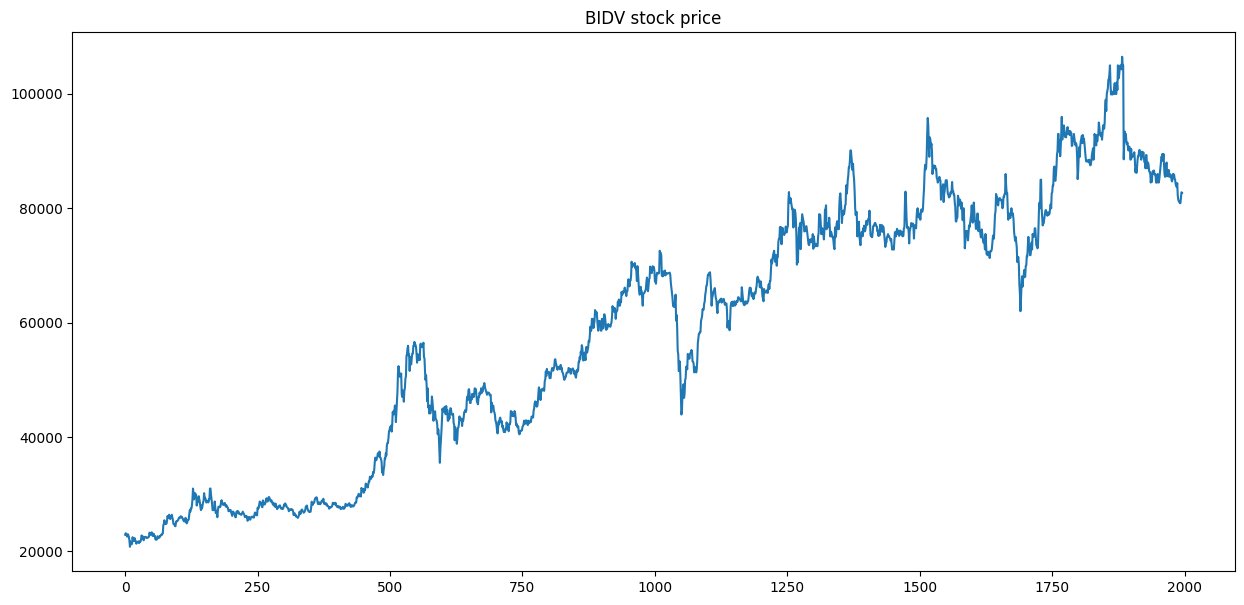

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(data['Price'])
plt.title('BIDV stock price')
plt.show()

In [ ]:
data

,Date,Price,Open,High,Low,Vol.,Change %
0,01/05/2016,22899,23115,23384,22846,1.95M,0
1,01/06/2016,23169,22899,23277,22899,1.20M,0
2,01/07/2016,22899,23061,23115,22630,1.61M,0
3,01/08/2016,22738,22792,22953,22468,1.17M,0
4,01/11/2016,22576,22738,22846,22522,1.28M,0
...,...,...,...,...,...,...,...
1991,12/21/2023,80900,81000,81000,80300,2.03M,0
1992,12/22/2023,80900,80900,81100,80400,1.58M,0
1993,12/25/2023,81800,80900,81800,80700,1.30M,0
1994,12/26/2023,82800,82000,82800,82000,971.20K,0


In [ ]:
# Split the data into training, testing sets

train_size = int(0.7 * len(data))
test_size = len(data) - train_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

In [ ]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [ ]:
pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 15.8 MB/s eta 0:00:00


In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [ ]:
simple_exp = ExponentialSmoothing(trend=None, seasonal=None)

In [ ]:
#5. Fit model with train data
simple_exp.fit(y_train)

ExponentialSmoothing()

In [ ]:
# 6. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])


In [ ]:
y_pred = simple_exp.predict(test_data.index)

In [ ]:
#8. Predict next 30 days
last_index = data.index[-1]
fh = list(range(last_index + 1, last_index + 31))
y_next_30_days = simple_exp.predict(fh)

In [ ]:
# 9. Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Testing MAPE:', test_mape*100)

# MSLE
from sklearn.metrics import mean_squared_log_error
test_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', test_msle)


Testing RMSE: 10949.075064333681
Testing MAPE: 9.473885677618068
Testing MSLE: 0.016963363223607402


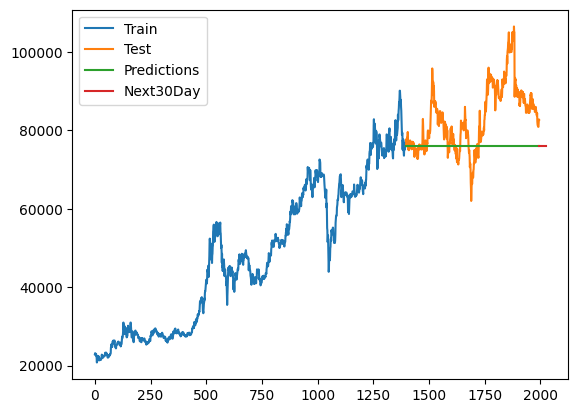

In [ ]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

# BIDV (8:2)



In [ ]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared, DotProduct
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
#2. Read data
data = pd.read_csv('/content/VCB.csv',sep=",")

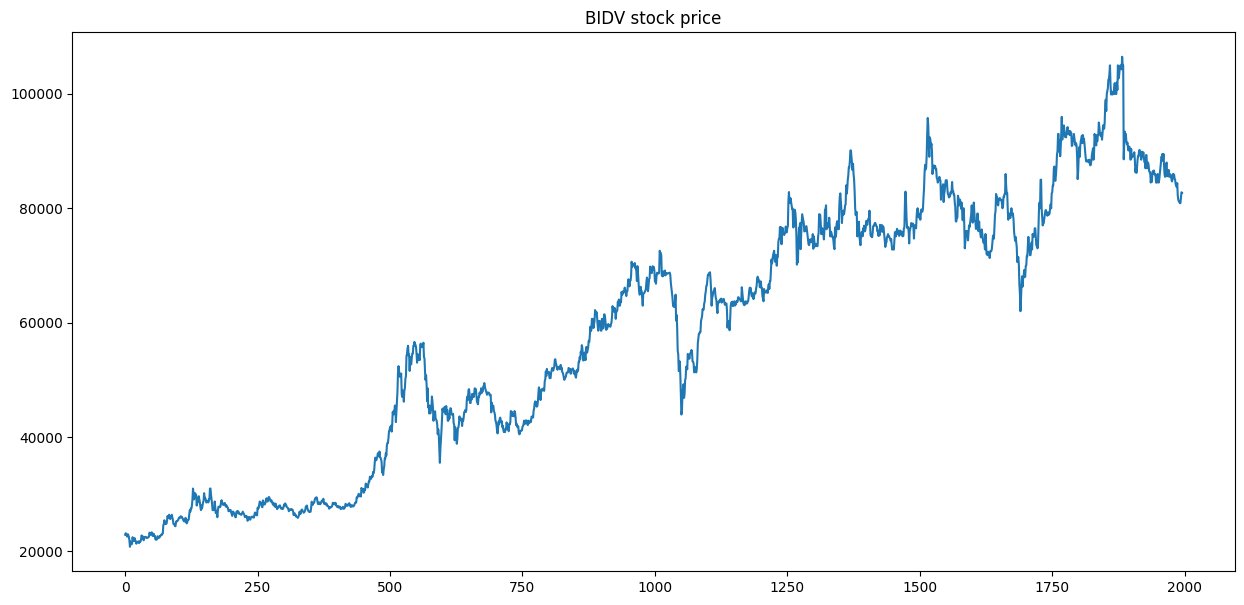

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(data['Price'])
plt.title('BIDV stock price')
plt.show()

In [ ]:
data

,Date,Price,Open,High,Low,Vol.,Change %
0,01/05/2016,22899,23115,23384,22846,1.95M,0
1,01/06/2016,23169,22899,23277,22899,1.20M,0
2,01/07/2016,22899,23061,23115,22630,1.61M,0
3,01/08/2016,22738,22792,22953,22468,1.17M,0
4,01/11/2016,22576,22738,22846,22522,1.28M,0
...,...,...,...,...,...,...,...
1991,12/21/2023,80900,81000,81000,80300,2.03M,0
1992,12/22/2023,80900,80900,81100,80400,1.58M,0
1993,12/25/2023,81800,80900,81800,80700,1.30M,0
1994,12/26/2023,82800,82000,82800,82000,971.20K,0


In [ ]:
# Split the data into training, testing sets

train_size = int(0.8 * len(data))
test_size = len(data) - train_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

In [ ]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [ ]:
pip install sktime

In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [ ]:
simple_exp = ExponentialSmoothing(trend=None, seasonal=None)

In [ ]:
#5. Fit model with train data
simple_exp.fit(y_train)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


ExponentialSmoothing()

In [ ]:
# 6. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])


In [ ]:
y_pred = simple_exp.predict(test_data.index)

In [ ]:
#8. Predict next 30 days
last_index = data.index[-1]
fh = list(range(last_index + 1, last_index + 31))
y_next_30_days = simple_exp.predict(fh)

In [ ]:
# 9. Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Testing MAPE:', test_mape*100)

# MSLE
from sklearn.metrics import mean_squared_log_error
test_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', test_msle)


Testing RMSE: 11717.858649041222
Testing MAPE: 10.814276747747469
Testing MSLE: 0.01897606930864523


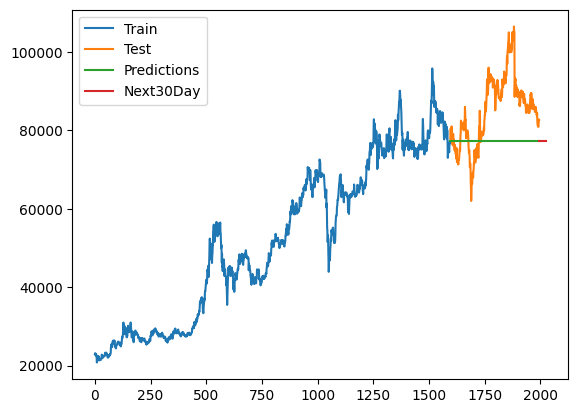

In [ ]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

# BIDV (9:1)

In [ ]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared, DotProduct
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
#2. Read data
data = pd.read_csv('/content/VCB.csv',sep=",")

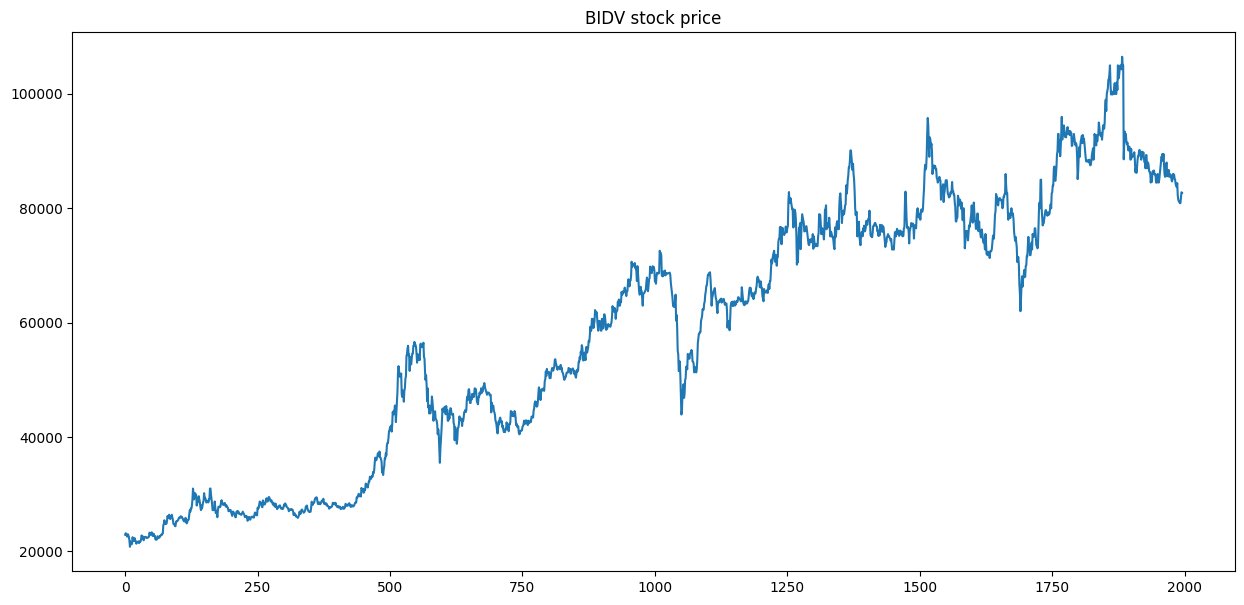

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(data['Price'])
plt.title('BIDV stock price')
plt.show()

In [ ]:
data

,Date,Price,Open,High,Low,Vol.,Change %
0,01/05/2016,22899,23115,23384,22846,1.95M,0
1,01/06/2016,23169,22899,23277,22899,1.20M,0
2,01/07/2016,22899,23061,23115,22630,1.61M,0
3,01/08/2016,22738,22792,22953,22468,1.17M,0
4,01/11/2016,22576,22738,22846,22522,1.28M,0
...,...,...,...,...,...,...,...
1991,12/21/2023,80900,81000,81000,80300,2.03M,0
1992,12/22/2023,80900,80900,81100,80400,1.58M,0
1993,12/25/2023,81800,80900,81800,80700,1.30M,0
1994,12/26/2023,82800,82000,82800,82000,971.20K,0


In [ ]:
# Split the data into training, testing sets

train_size = int(0.9 * len(data))
test_size = len(data) - train_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

In [ ]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [ ]:
pip install sktime

In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [ ]:
simple_exp = ExponentialSmoothing(trend=None, seasonal=None)

In [ ]:
#5. Fit model with train data
simple_exp.fit(y_train)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


ExponentialSmoothing()

In [ ]:
# 6. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])


In [ ]:
y_pred = simple_exp.predict(test_data.index)

In [ ]:
#8. Predict next 30 days
last_index = data.index[-1]
fh = list(range(last_index + 1, last_index + 31))
y_next_30_days = simple_exp.predict(fh)

In [ ]:
# 9. Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Testing MAPE:', test_mape*100)

# MSLE
from sklearn.metrics import mean_squared_log_error
test_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', test_msle)


Testing RMSE: 6000.795398742885
Testing MAPE: 5.241282695306362
Testing MSLE: 0.004178850207964822


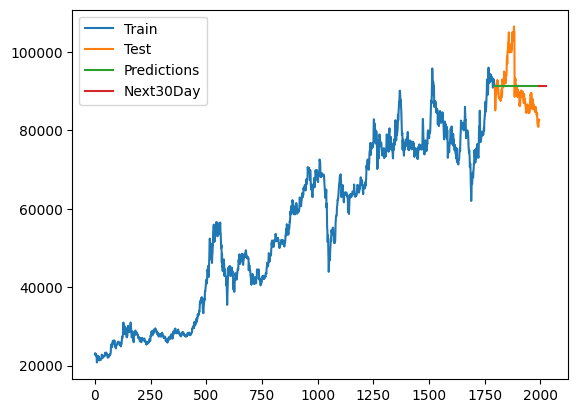

In [ ]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()